# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname:Tonazzo

Student name:Valentina
    
ID:1143465

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2060939# place a random seed
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 49 54 69 55 70 67 50 62 61]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


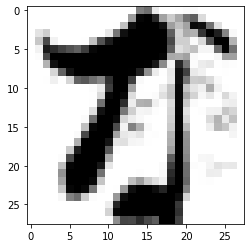

LABEL: 4
INPUT:


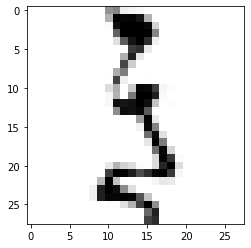

LABEL: 1
INPUT:


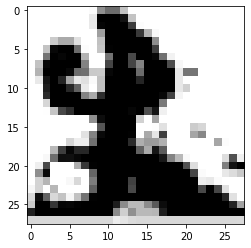

LABEL: 6
INPUT:


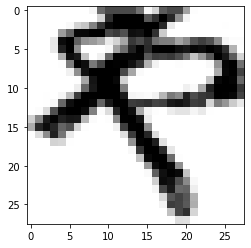

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
import pandas as pd
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
svc = SVC(kernel='linear')    # ADD YOUR CODE
model = GridSearchCV(svc, parameters)
model.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", model.best_params_)# ADD YOUR CODE


print("Score with best parameters:",model.best_score_)# ADD YOUR CODE


print("All scores on the grid:",pd.DataFrame(model.cv_results_))# ADD YOUR CODE
# ADD YOUR CODE

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.1}
Score with best parameters: 0.7766666666666667
All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.066073      0.004902         0.014737        0.000704    0.01   
1       0.065039      0.005218         0.015219        0.003607     0.1   
2       0.066615      0.005415         0.013857        0.000463       1   
3       0.061492      0.001201         0.013937        0.000719      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.783333           0.741667           0.758333   
1   {'C': 0.1}           0.758333           0.733333           0.816667   
2     {'C': 1}           0.750000           0.733333           0.800000   
3    {'C': 10}           0.750000           0.733333           0.800000   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.800000           0.7416

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
svc2 = SVC(kernel='poly',degree=2)    # ADD YOUR CODE
model2 = GridSearchCV(svc2, parameters)
model2.fit(X_train, y_train)


# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", model2.best_params_)
# ADD YOUR CODE

print("Score with best parameters:",model2.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:",pd.DataFrame(model2.cv_results_)) 
# ADD YOUR CODE

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7866666666666666

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.105031      0.007173         0.017236        0.000348    0.01   
1       0.076782      0.005880         0.013724        0.000257    0.01   
2       0.089003      0.002237         0.013195        0.000275    0.01   
3       0.102780      0.000532         0.017057        0.000218     0.1   
4       0.088540      0.000620         0.013162        0.000241     0.1   
5       0.088129      0.000735         0.013225        0.000307     0.1   
6       0.083093      0.001143         0.013764        0.000218       1   
7       0.088224      0.001170         0.013258        0.000286       1   
8       0.088290      0.000678         0.013221        0.000262       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, 

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

svc3 = SVC(kernel='poly',degree=degree)    # ADD YOUR CODE
model3 = GridSearchCV(svc3, parameters)
model3.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:", model3.best_params_)
# ADD YOUR CODE

print("Score with best parameters:", model3.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:",pd.DataFrame(model3.cv_results_))
# ADD YOUR CODE

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7683333333333333

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.115239      0.005913         0.017453        0.000235    0.01   
1       0.097891      0.001383         0.014518        0.001609    0.01   
2       0.097987      0.000931         0.014044        0.000380    0.01   
3       0.105305      0.000352         0.017125        0.000209     0.1   
4       0.097610      0.000582         0.013817        0.000255     0.1   
5       0.097505      0.000438         0.013830        0.000292     0.1   
6       0.093720      0.001309         0.014356        0.000191       1   
7       0.097451      0.000553         0.013782        0.000180       1   
8       0.097593      0.000656         0.013785        0.000266       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

svc4 = SVC(kernel='rbf')    # ADD YOUR CODE
model4 = GridSearchCV(svc4, parameters)
model4.fit(X_train, y_train)

# ADD YOUR CODE

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:",model4.best_params_)
# ADD YOUR CODE

print("Score with best parameters:",model4.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:",pd.DataFrame(model4.cv_results_))
# ADD YOUR CODE

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.825

All scores on the grid:     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.131376      0.006682         0.039376        0.001019     0.1   
1        0.129205      0.001558         0.039449        0.000790     0.1   
2        0.136419      0.000166         0.038982        0.000106     0.1   
3        0.135376      0.000231         0.040187        0.001101     0.1   
4        0.110321      0.000878         0.039367        0.001251       1   
5        0.125058      0.000404         0.038311        0.001591       1   
6        0.139162      0.000283         0.039145        0.000147       1   
7        0.137146      0.000204         0.039113        0.000303       1   
8        0.079375      0.001477         0.034011        0.000760      10   
9        0.129160      0.000595         0.037659        0.001040      10   
10       0.140157      0.00030

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

I observe that RBF kernel gives the best result with C=10 and gamma=0.01, with polynomial kernels results are worse, we have a small improvement with kernel poly=2, but then poly=3 kernel gives similar results of linear kernel.  

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

best_SVM = model4 # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train, y_train) # ADD YOUR CODE


# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.182750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


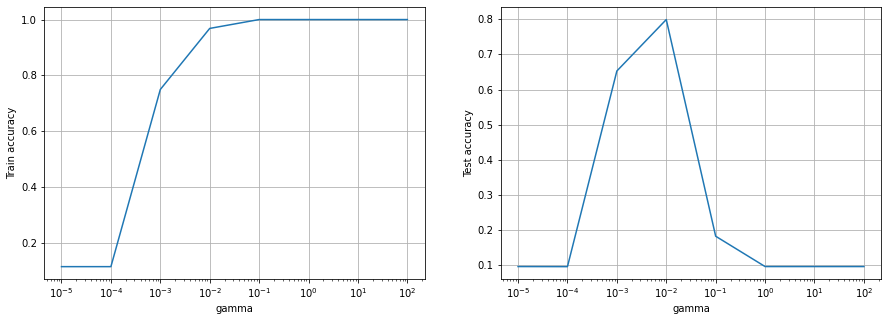

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for i in range (len(gamma_values)):
    svc6 = SVC(kernel='rbf', C=1, gamma=gamma_values[i])
    svc6.fit(X_train, y_train)
    train_acc_list.append(svc6.score(X_train, y_train))
    test_acc_list.append(svc6.score(X_test, y_test))
    

#for i in range (len(gamma_values)):
 #   print(1-train_acc_list[i],1-test_acc_list[i])

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

As we can deduce from the graphics, training error rapidly decreses when gamma increses from gamma=10^-4 to gamma=10^-2 and then it stabilize itself on the value 0.0. Instead test error reaches a minimum value at gamma=10^-2, so we can conclude that the best value of gamma is 10^-2 and going over that value means overfiiting the data. 

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [183 207 189 205 223 181 205 219 193 195]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE
best_SVM = model4 # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train, y_train)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.110552


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

# ADD YOUR CODE
reg = linear_model.LogisticRegression(C=1e5)
reg.fit(X_train, y_train)
training_error = 1 - reg.score(X_train, y_train)
test_error = 1 - reg.score(X_test, y_test)


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.281707


/home/valentina/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
# ADD YOUR CODE

reg2 = linear_model.LogisticRegression(C=1)
reg2.fit(X_train, y_train)
training_error2 = 1 - reg2.score(X_train, y_train)
test_error2 = 1 - reg2.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error2)
print ("Best regularized logistic regression test error: %f" % test_error2)

Best regularized logistic regression training error: 0.001000
Best regularized logistic regression test error: 0.260690


/home/valentina/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

According with theory, the result for test error with m=2000 is smaller then the previous case m=600, this is due to the fact that learning is better with larger traning sample. 
On the other hand, logistic regression with and without regularization has a bigger test error, also training error is different from zero in the regularized case, this may be due to some overfitting effect.



## TO DO 10
Plot an item of clothing (do you mean symbol character kana???) that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


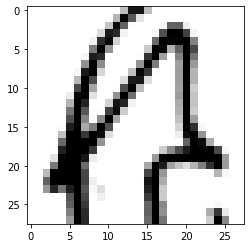

LABEL: 8
index associated to the last misclassified: 57996
LR prediction: 3
SVM prediction: 8


In [19]:
LR_prediction = reg2.predict(X_test)# ADD CODE
SVM_prediction = best_SVM.predict(X_test) # ADD CODE

# ADD CODE
c=0
for i in range(len(LR_prediction)):
    if LR_prediction[i]!=y_test[i] and SVM_prediction[i]==y_test[i]:
        c=i
        
plot_input(X_test,y_test,c)
print("index associated to the last misclassified:", c)
print("LR prediction:", LR_prediction[c])
print("SVM prediction:", SVM_prediction[c])




## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2, suppress=True, floatmode='fixed') # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test,SVM_prediction)# ADD CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test,LR_prediction)  # ADD CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5817 5793 5811 5795 5777 5819 5795 5781 5807 5805]

 Confusion matrix SVM  
 
 [[5428    7    4   36  104   55   13   97   38   35]
 [  15 5162  126   59  122    6  140    5   93   65]
 [   0  120 4838  103   85   29  382   17  185   52]
 [  13   62   94 5432   63   37   18   17   50    9]
 [ 139   89  153   50 5108   13   73   14   67   71]
 [  53   59  130  176   74 5178   41   21   72   15]
 [   8  107  344   65  230   32 4896   49   51   13]
 [  37   17   63   38  199   24   74 5222   56   51]
 [  53  149   82   94   48   45  143    7 5154   32]
 [  25  218  167   23  129   14   20   19   20 5170]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.00 0.00 0.01 0.02 0.01 0.00 0.02 0.01 0.01]
 [0.00 0.89 0.02 0.01 0.02 0.00 0.02 0.00 0.02 0.01]
 [0.00 0.02 0.83 0.02 0.01 0.00 0.07 0.00 0.03 0.01]
 [0.00 0.01 0.02 0.94 0.01 0.01 0.00 0.00 0.01 0.00]
 [0.02 0.02 0.03 0.01 0.88 0.00 0.01 0.00 0.01 0.01]
 [0.01 0.01 0.02 0.03 0.01 0.89 0.01 0.00 0.0

In [21]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
#non è già stato fatto?? 

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

Actually they are similar, but in the diagonal of confusion matrices we can see some differences, maybe this differences occure because some classes are similr to other ones.
